In [16]:
import os
import numpy as np
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

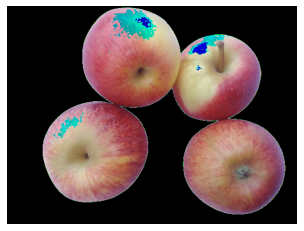

In [53]:
# Read the image
I = io.imread('/content/FreshApple__1_-removebg-preview.jpg')/255.0
# Cut out the foreground layer
foreground = I.copy()
foreground[foreground>=0.9]=0 # Setting surrounding pixels to zero
plt.axis('off')
plt.imshow(foreground)
plt.show()

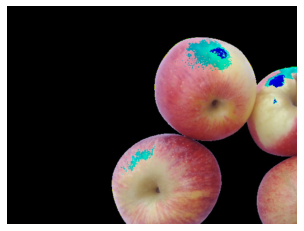

In [49]:
### Apply augmentations on the foreground.

def foregroundAug(foreground):
    # Random rotation, zoom, translation
    angle = np.random.randint(-10,10)*(np.pi/180.0) # Convert to radians
    zoom = np.random.random()*0.4 + 0.8 # Zoom in range [0.8,1.2)
    t_x = np.random.randint(0, int(foreground.shape[1]/3))
    t_y = np.random.randint(0, int(foreground.shape[0]/3))

    tform = transform.AffineTransform(scale=(zoom,zoom),
                                rotation=angle,
                                translation=(t_x, t_y))
    foreground = transform.warp(foreground, tform.inverse)

    # Random horizontal flip with 0.5 probability
    if(np.random.randint(0,100)>=50):
        foreground = foreground[:, ::-1]
        
    return foreground

foreground_new = foregroundAug(foreground)
# Visualize the foreground
plt.imshow(foreground_new)
plt.axis('off')
plt.show()

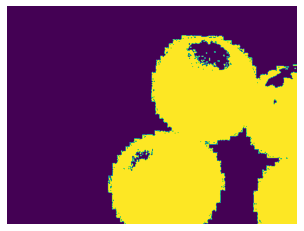

In [50]:
# Create a mask for this new foreground object
def getForegroundMask(foreground):
    mask_new = foreground.copy()[:,:,0]
    mask_new[mask_new>0] = 1
    return mask_new

mask_new = getForegroundMask(foreground_new)
plt.imshow(mask_new)
plt.axis('off')
plt.show()

In [51]:
# Random selection of background from the backgrounds folder
background_fileName = np.random.choice(os.listdir("/content/backgrounds"))
background = io.imread('./backgrounds/'+background_fileName)/255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


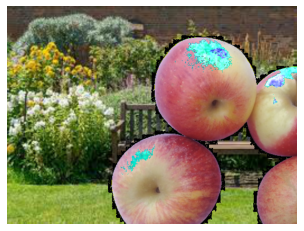

In [52]:
def compose(foreground, mask, background):
    # resize background
    background = transform.resize(background, foreground.shape[:2])

    # Subtract the foreground area from the background
    background = background*(1 - mask.reshape(foreground.shape[0], foreground.shape[1], 1))

    # Finally, add the foreground
    composed_image = background + foreground
    
    return composed_image

composed_image = compose(foreground_new, mask_new, background)
plt.imshow(composed_image)
plt.axis('off')
plt.show()